<h4>import modules</h4>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

#### Creating A DataFrame

In [3]:
df=pd.read_csv(r"Advertising.csv",index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<b>Insights</b>:-We will just start with sgd as the data is allready filtered.

#### Seprating x and y Column

In [4]:
x=df[['TV','radio','newspaper']]
y=df['sales']

#### Scale the data

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

#### Splitting the data (80%-20%)
* 80:-Training data
* 20:-test data

In [6]:
#We are spliting the data into train and test split
#Here the test size is 0.2 ie training has 80% data and testing has 20% data 
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


#### Creating a sgd Model

In [7]:
from sklearn.linear_model import SGDRegressor
 
lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.1,  #alpha
                  shuffle=True, 
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True, 
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(x_train,y_train)
 
 
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[13.83540781]
[ 2.96722679  2.98503017 -0.10325843]


#### Predicting the score

In [8]:
y_pred_new=lm.predict(x_test)
lm.score(x_test,y_test)

0.7851184362823995

#### Error

In [9]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7851184362823995
RMSE: 2.9572947684786306
Adj R-square: 0.7818294327561097


#### Hyper-parameters Tunning 

{0.1: 0.7851184362823995, 0.01: 0.8342925233113334, 0.001: 0.8389207201202611, 0.0001: 0.8276959865003775}


C:\Users\karth\AppData\Local\Temp\ipykernel_24096\1004079419.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(et_list,score,"rs-",color='red')


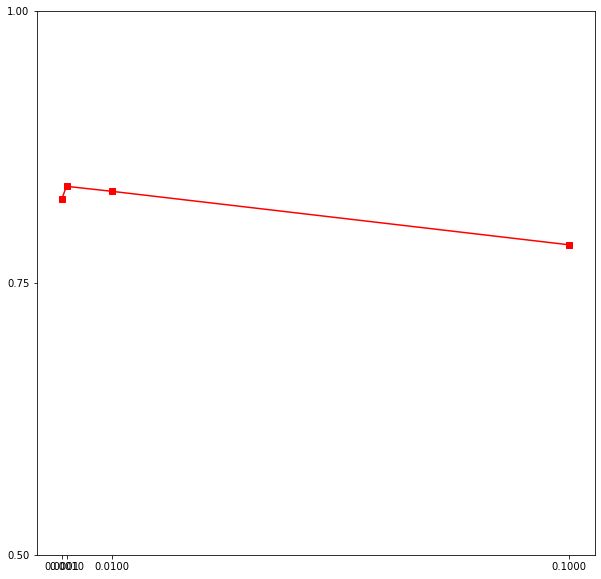

In [10]:
#Tunning Learning rate ie alpha
from sklearn.linear_model import SGDRegressor
score=[]
et_list=[]
eta={}
et=0.1
for e in range(0,4): 
    lm = SGDRegressor(learning_rate="constant",  
                      #want to use a constant learning rate
                      eta0=et,  #alpha
                      shuffle=True, 
            #while going ahead with the next epoch shuffle the obs
                      random_state=10, #set seed
                      max_iter=1000, #max no of epochs
                      early_stopping=True, 
                      #stop if zero convergence is reached first
                      n_iter_no_change=5) 
            #no of obs to wait for before concluding upon early stopping
    lm.fit(x_train,y_train)
    sc=lm.score(x_test,y_test)
    score.append(sc)
    et_list.append(et)
    eta[et]=sc
    et=et/10
    
#     print(et)
print(eta)
plt.figure(figsize=(10,10))


plt.plot(et_list,score,"rs-",color='red')
plt.xticks(et_list)
plt.yticks([0.5,0.75,1])
plt.show()
#learning rate=0.001

{100: 0.8342925233113334, 400: 0.8342925233113334, 1600: 0.8342925233113334, 6400: 0.8342925233113334}


C:\Users\karth\AppData\Local\Temp\ipykernel_24096\1379480575.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(et_list,score,"rs-",color='red')


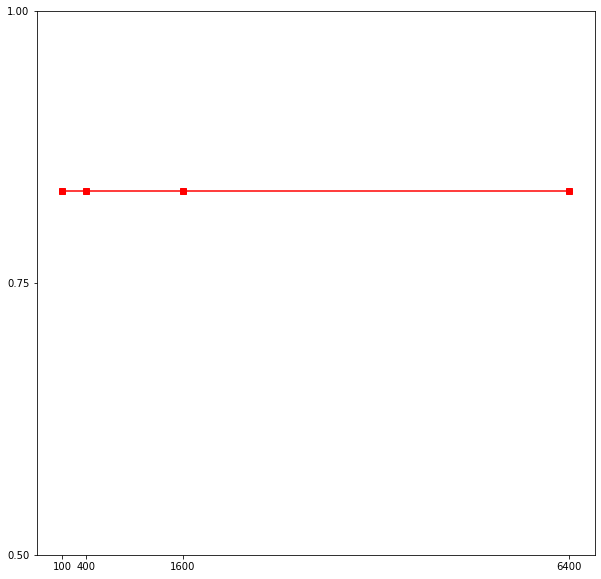

In [15]:
#Tunning Learning rate ie alpha
from sklearn.linear_model import SGDRegressor
score=[]
et_list=[]
eta={}
et=100
for e in range(0,4): 
    lm = SGDRegressor(learning_rate="constant",  
                      #want to use a constant learning rate
                      eta0=0.01,  #alpha
                      shuffle=True, 
            #while going ahead with the next epoch shuffle the obs
                      random_state=10, #set seed
                      max_iter=et, #max no of epochs
                      early_stopping=True, 
                      #stop if zero convergence is reached first
                      n_iter_no_change=5) 
            #no of obs to wait for before concluding upon early stopping
  
    lm.fit(x_train,y_train)
    sc=lm.score(x_test,y_test)
    score.append(sc)
    et_list.append(et)
    eta[et]=sc
    et=et*4
    
#     print(et)
print(eta)
plt.figure(figsize=(10,10))


plt.plot(et_list,score,"rs-",color='red')
plt.xticks(et_list)
plt.yticks([0.5,0.75,1])
plt.show()
#max_epoch=1000

{5: 0.8342925233113334, 7: 0.8395559849007264, 9: 0.8381481046216059, 11: 0.8393364296548529, 13: 0.8356502403462608, 15: 0.8412539996908259, 17: 0.8402479647730056, 19: 0.8395428400550099, 21: 0.8376126973499658, 23: 0.8381136049706341, 25: 0.841485615934729, 27: 0.8448082239552911, 29: 0.8361083888945129, 31: 0.8340045547328462, 33: 0.841160191136789, 35: 0.8414110193036587, 37: 0.8394355509825533, 39: 0.8374247583437112, 41: 0.8408911504354647, 43: 0.8402733135396017, 45: 0.8399011224406803, 47: 0.8363331532578683, 49: 0.8370223894852797, 51: 0.8373335335297777, 53: 0.8376124821842765, 55: 0.8380438081085237, 57: 0.8380270271613437, 59: 0.8383290516324208, 61: 0.8388995183053832, 63: 0.8394129202291778, 65: 0.83630775332777, 67: 0.8427907759570872, 69: 0.8423208891782921, 71: 0.8359819721212964, 73: 0.8397880751580254, 75: 0.8395564375518324, 77: 0.8391865431527381, 79: 0.8384564841410308, 81: 0.8373651988470562, 83: 0.8413425465543389}


C:\Users\karth\AppData\Local\Temp\ipykernel_24096\2906602556.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(et_list,score,"rs-",color='red')


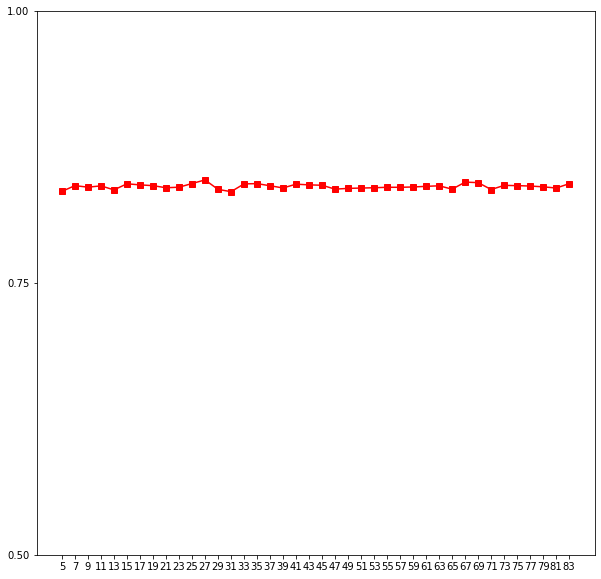

In [17]:
#Tunning Learning rate ie alpha
from sklearn.linear_model import SGDRegressor
score=[]
et_list=[]
eta={}
et=5
for e in range(0,40): 
    lm = SGDRegressor(learning_rate="constant",  
                      #want to use a constant learning rate
                      eta0=0.01,  #alpha
                      shuffle=True, 
            #while going ahead with the next epoch shuffle the obs
                      random_state=10, #set seed
                      max_iter=1000, #max no of epochs
                      early_stopping=True, 
                      #stop if zero convergence is reached first
                      n_iter_no_change=et) 
            #no of obs to wait for before concluding upon early stopping
  
    lm.fit(x_train,y_train)
    sc=lm.score(x_test,y_test)
    score.append(sc)
    et_list.append(et)
    eta[et]=sc
    et=et+2
    
#     print(et)
print(eta)
plt.figure(figsize=(10,10))


plt.plot(et_list,score,"rs-",color='red')
plt.xticks(et_list)
plt.yticks([0.5,0.75,1])
plt.show()
#n_iter_no_change=27

In [20]:
from sklearn.linear_model import SGDRegressor
 
lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.001,  #alpha
                  shuffle=True, 
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True, 
                  #stop if zero convergence is reached first
                  n_iter_no_change=27) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(x_train,y_train)
 
 
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[14.04849688]
[ 3.77891444  2.84936312 -0.04083345]


In [21]:
y_pred_new=lm.predict(x_test)
lm.score(x_test,y_test)

0.8384827236538027

In [22]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8384827236538027
RMSE: 2.563920344101336
Adj R-square: 0.8360105204444221


So after tunning the Hyper Parameters we make our Rsquared from 0.78 to 0.83